In [1]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle
from sklearn.cluster import KMeans

In [2]:
# clean out NaNs and zeros
def extract_all_active_observations_v2(interval_matrix_data, array_indices):
    # exclude time column
    observations = interval_matrix_data[:,1:]
    selected_obs = np.hstack([observations[:,i*3:i*3+3] for i in array_indices])
    cleaned_data = []
    ind = []
    for i in range(selected_obs.shape[0]):
        if not any(np.isnan(selected_obs[i,:])) and not any(selected_obs[i,:]==0):
            cleaned_data.append(selected_obs[i,:])
            ind.append(i)
    selected_raw_obs = interval_matrix_data[ind,:]        
    return  np.vstack(cleaned_data), selected_raw_obs

In [7]:
def plot_time_series(data):
    # only plotting x
    length = data.shape[0]
    fig = plt.figure(figsize = [20,10])
    ax1 = fig.add_subplot(511)
    ax1.plot(data[:,1], label='array 0')  # array 0
    ax1.set_xlim(0,length)
    ax1.set_ylim(-1,1)
    ax1.legend()
    ax2 = fig.add_subplot(512)
    ax2.plot(data[:,4], label='array 1')  # array 1
    ax2.set_xlim(0,length)
    ax2.set_ylim(-1,1)
    ax2.legend()
    ax3 = fig.add_subplot(513)
    ax3.plot(data[:,7], label='array 2')  # array 2
    ax3.set_xlim(0,length)
    ax3.set_ylim(-1,1)
    ax3.legend()  
    ax4 = fig.add_subplot(514)
    ax4.plot(data[:,10], label='array 3') # array 3
    ax4.set_xlim(0,length)
    ax4.set_ylim(-1,1)
    ax4.legend()
    ax5 = fig.add_subplot(515)
    ax5.plot(data[:,16], label='array 5') # array 5
    ax5.set_xlim(0,length)
    ax5.set_ylim(-1,1)
    ax5.legend()
    plt.show()

## note
Different from previous static point experiments, two arrays are mounted onto the wall: array 0 and 1, and array 2, 3, 5 are mounted to the ceiling. 

In [20]:
chair2 = get_time_interval_matrix_data("Dec 29 2020 03:35PM", "Dec 29 2020 03:36PM")
chair3 = get_time_interval_matrix_data("Dec 29 2020 03:36PM", "Dec 29 2020 03:37PM")
chair4 = get_time_interval_matrix_data("Dec 29 2020 03:37PM", "Dec 29 2020 03:38PM")
chair5 = get_time_interval_matrix_data("Dec 29 2020 03:38PM", "Dec 29 2020 03:39PM")
chair1 = get_time_interval_matrix_data("Dec 29 2020 03:39PM", "Dec 29 2020 03:40PM")
chairs = get_time_interval_matrix_data("Dec 29 2020 03:35PM", "Dec 29 2020 03:40PM")
# chairs = get_time_interval_matrix_data("Dec 29 2020 03:26PM", "Dec 29 2020 03:31PM")
static_point_data = np.vstack([chair2, chair3, chair4, chair5, chair1])
static_point_cdata = get_cdata(static_point_data)
projections = project_to_eigen_vectors(static_point_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


## projection with uncleaned data

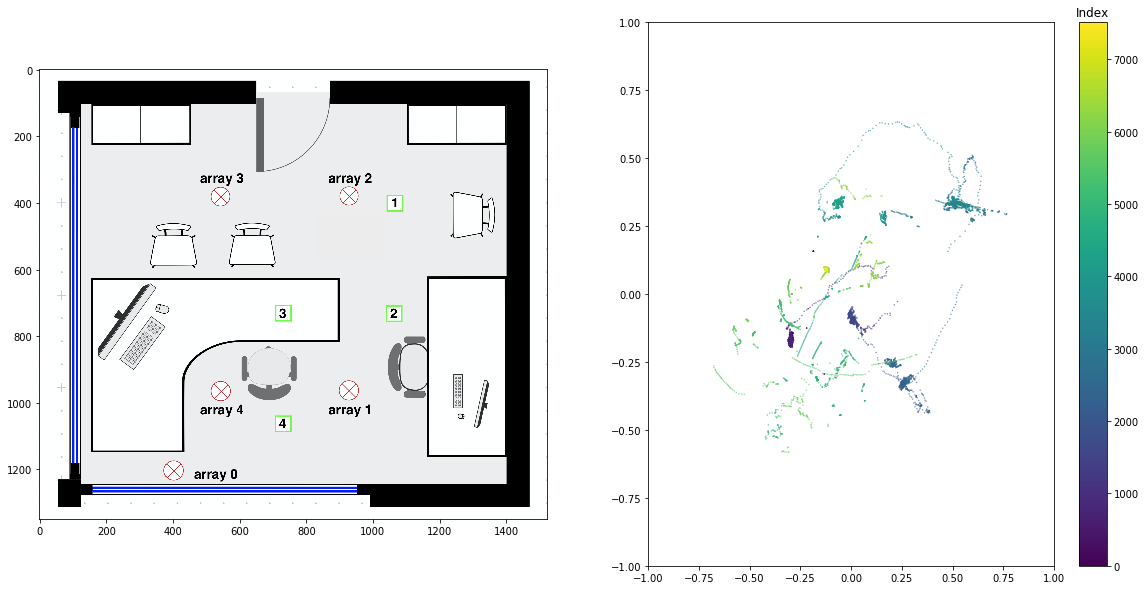

In [4]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections[:,0], projections[:,1], c = np.arange(projections.shape[0]), s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

### uncleaned data time series

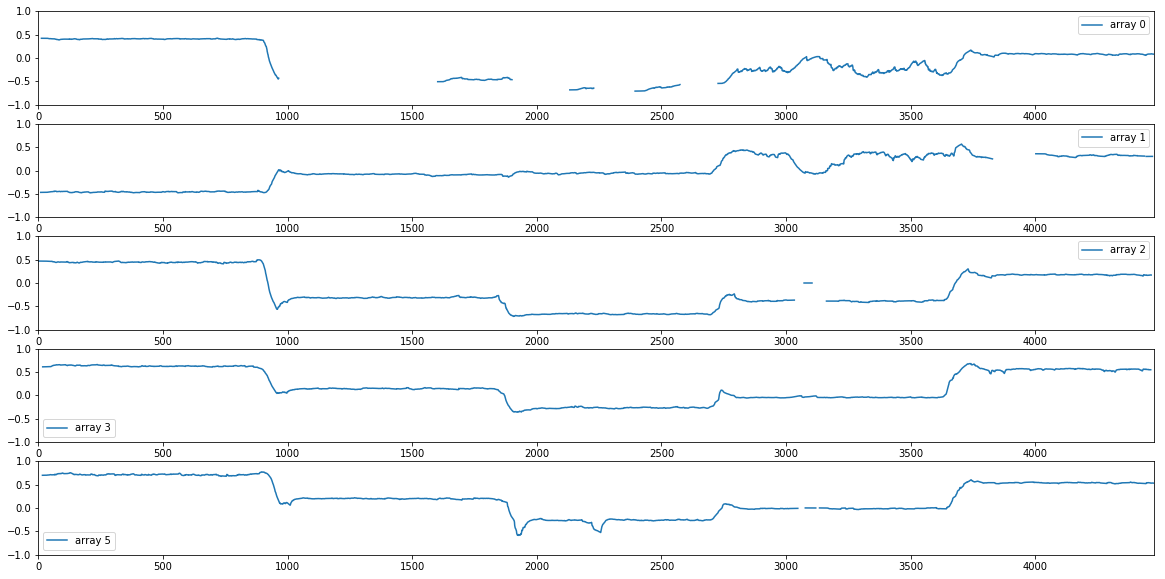

In [17]:
plot_time_series(static_point_data)

### extract all active observations (no NaN, no zeros)

In [21]:
chairs_cleaned, chairs_og = extract_all_active_observations_v2(chairs, [1,2,3,5])

## projection with all real data (no NaN, no zeros)

In [22]:
# Need to Nan out data from array 0
chairs_og[:,1:4] = np.NaN

In [23]:
chairs_og_cdata = get_cdata(chairs_og)
chairs_og_projections = project_to_eigen_vectors(chairs_og_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

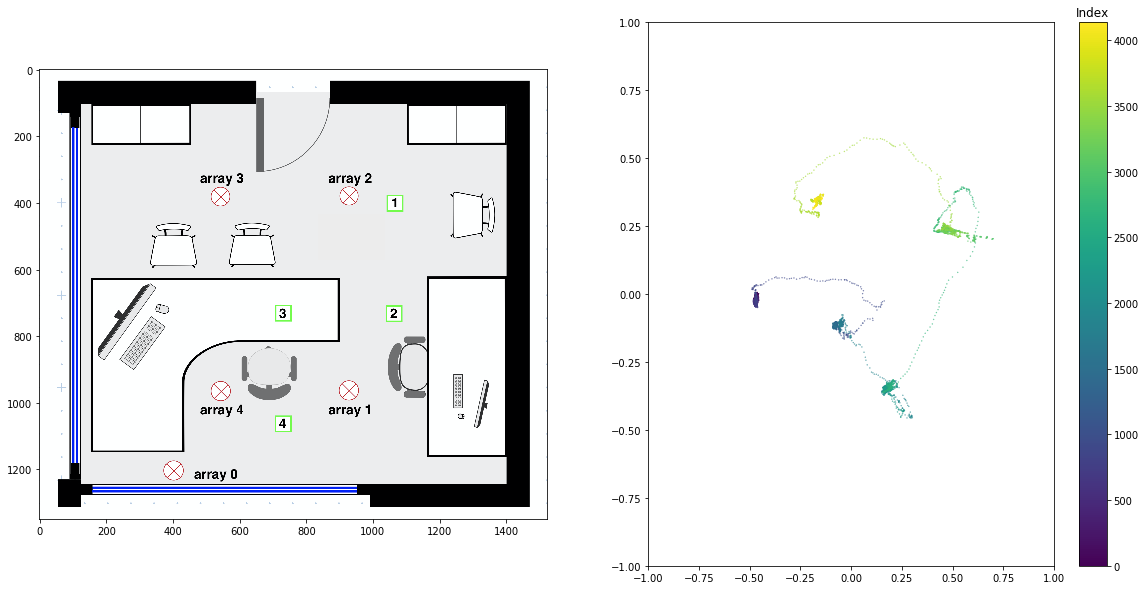

In [24]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(chairs_og_projections[:,0], 
                  chairs_og_projections[:,1], 
                  c = np.arange(chairs_og_projections.shape[0]), 
                  s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

### no NaN, no zeros data time series

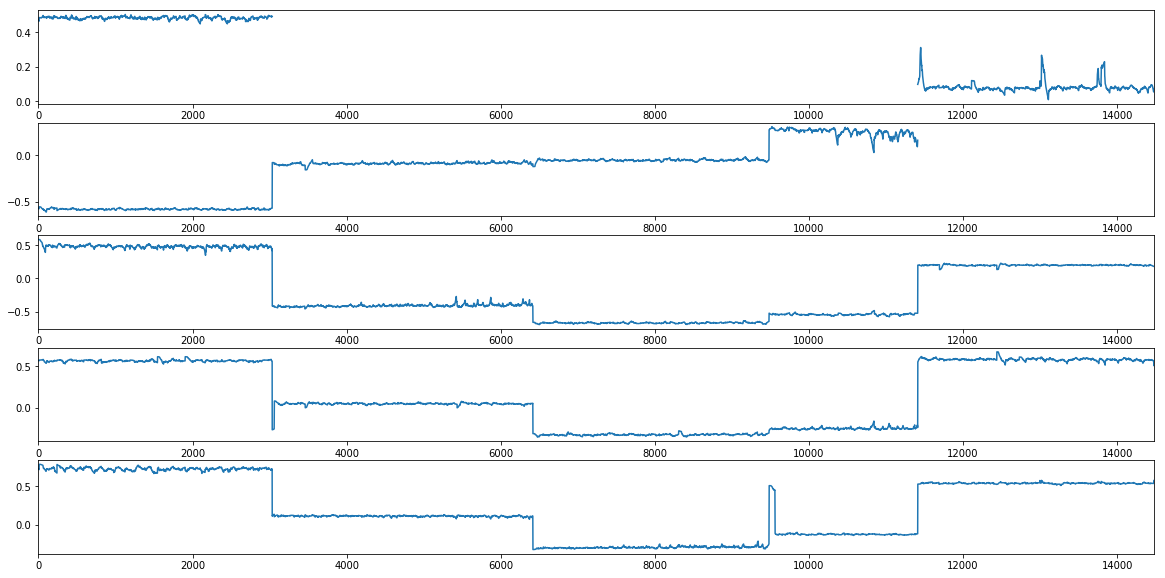

In [76]:
# only plotting x
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(511)
ax1.plot(selected_og_v2[:,1])  # array 0
ax1.set_xlim(0,14484)
ax2 = fig.add_subplot(512)
ax2.plot(selected_og_v2[:,4])  # array 1
ax2.set_xlim(0,14484)
ax3 = fig.add_subplot(513)
ax3.plot(selected_og_v2[:,7])  # array 2
ax3.set_xlim(0,14484)
ax4 = fig.add_subplot(514)
ax4.plot(selected_og_v2[:,10]) # array 3
ax4.set_xlim(0,14484)
ax5 = fig.add_subplot(515)
ax5.plot(selected_og_v2[:,16]) # array 5
ax5.set_xlim(0,14484)
plt.show()

## Conclusion

Discontinuous recording and zero values are the cause of splitting image in the PCA space. Since PCA projection is a linear operation. Wherever recording becomes discontinuous, the missing observations are then filled with NaNs, leading to a different sum. The same effect takes place when the observation value is zero.